In [1]:
import matplotlib.pyplot as plt
from skimage import data, filters
import numpy as np

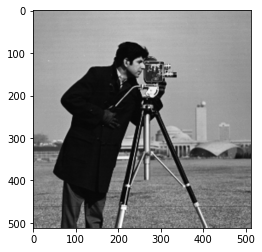

In [2]:
image = data.camera()
plt.imshow(image, cmap='gray');

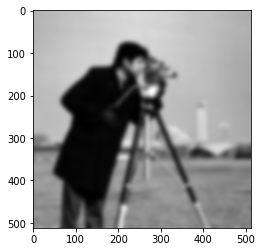

In [3]:
smooth_image = filters.gaussian(image, 5)
plt.imshow(smooth_image, cmap='gray');

In [4]:
a = np.zeros((3, 3))
a[1, 1] = 1
a

array([[0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [5]:
filters.gaussian(a, sigma=0.4)

array([[0.00163116, 0.03712502, 0.00163116],
       [0.03712502, 0.84496158, 0.03712502],
       [0.00163116, 0.03712502, 0.00163116]])

## Get the code from Github

In [6]:
!git clone https://github.com/nathanhubens/MultimedIA.git

Cloning into 'MultimedIA'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 88 (delta 20), reused 24 (delta 10), pack-reused 52
Unpacking objects: 100% (88/88), done.


## Import libraries

In [7]:
import torch
from torchvision.models import resnet50
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms as T

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model = resnet50(pretrained=True)
model = model.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [8]:
class SaveOutput:
    def __init__(self):
        self.outputs = []
        
    def __call__(self, module, module_in, module_out):
        self.outputs.append(module_out)
        
    def clear(self):
        self.outputs = []

In [9]:
save_output = SaveOutput()

hook_handles = []

for layer in model.modules():
    if isinstance(layer, torch.nn.modules.conv.Conv2d):
        handle = layer.register_forward_hook(save_output)
        hook_handles.append(handle)

In [10]:
cd MultimedIA/Lesson\ 4

/content/MultimedIA/Lesson 4


In [11]:
image = Image.open('maio.jpg')
transform = T.Compose([T.Resize((224, 224)), T.ToTensor()])
X = transform(image).unsqueeze(dim=0).to(device)

out = model(X)

(-0.5, 359.5, 360.5, -0.5)

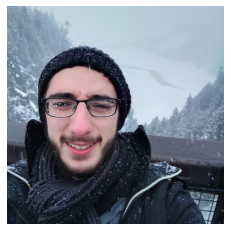

In [12]:
plt.imshow(image)
plt.axis('off')

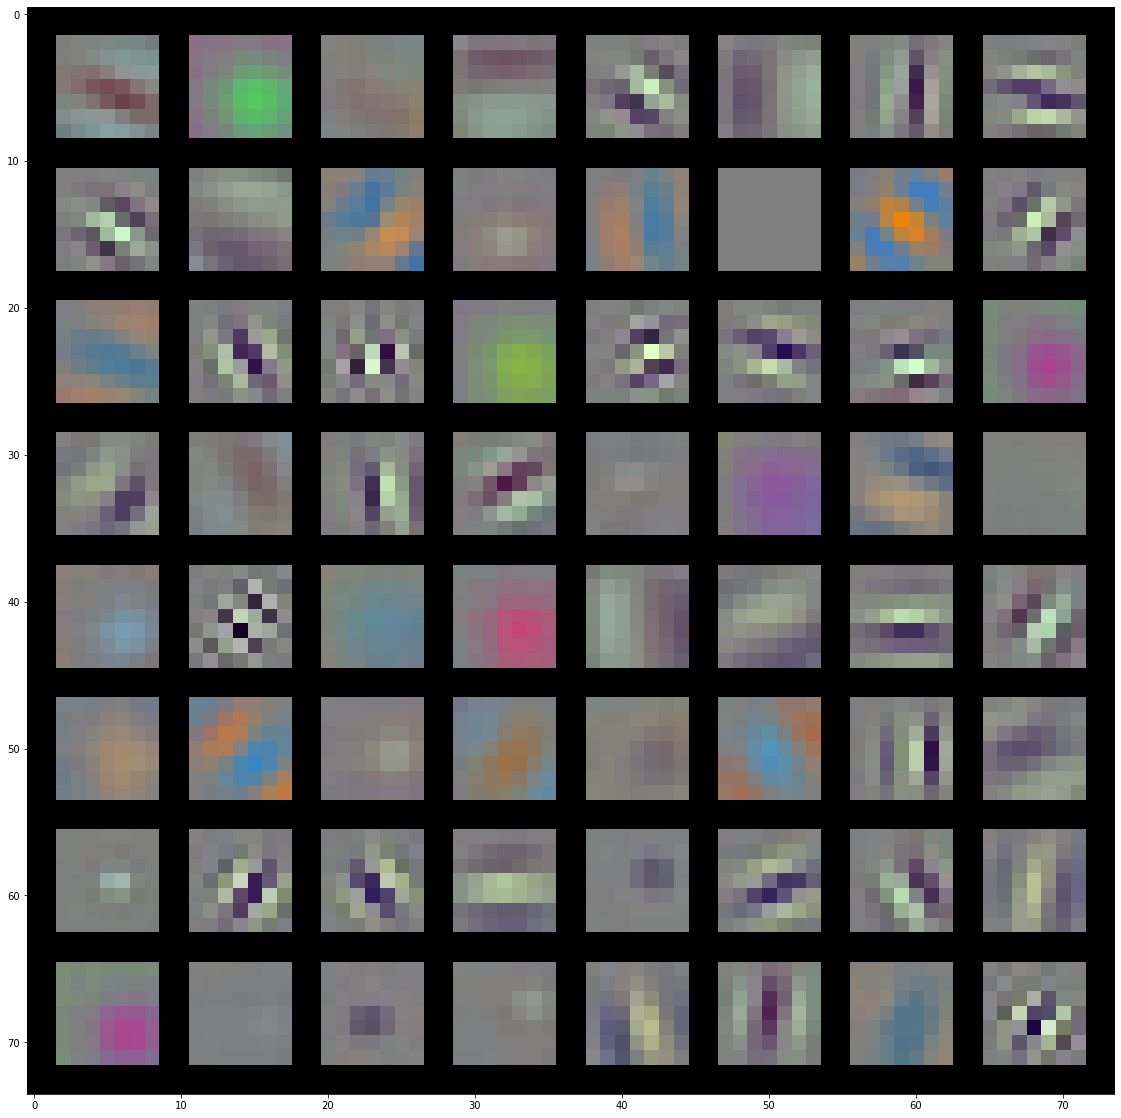

In [13]:
from torchvision.utils import make_grid

kernels = model.conv1.weight.detach().clone()
kernels = kernels - kernels.min()
kernels = kernels / kernels.max()
img = make_grid(kernels)
plt.figure(figsize=(20,20))
plt.imshow(img.cpu().permute(1, 2, 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 913.5, 913.5, -0.5)

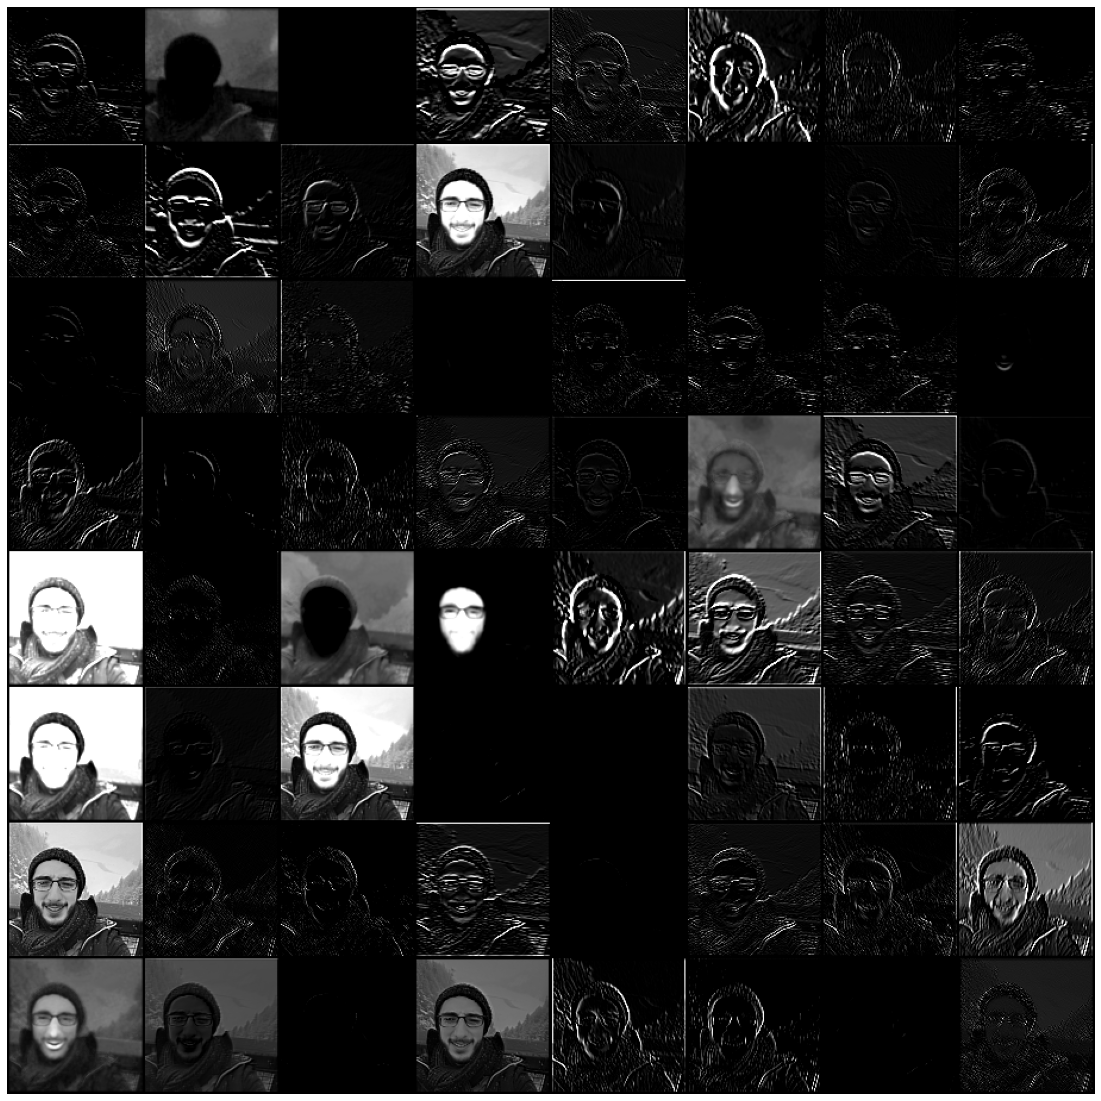

In [14]:
img = make_grid(save_output.outputs[0].detach().cpu().permute(1,0,2,3))
plt.figure(figsize=(20,20))
plt.imshow(img.permute(1, 2, 0))
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 465.5, 465.5, -0.5)

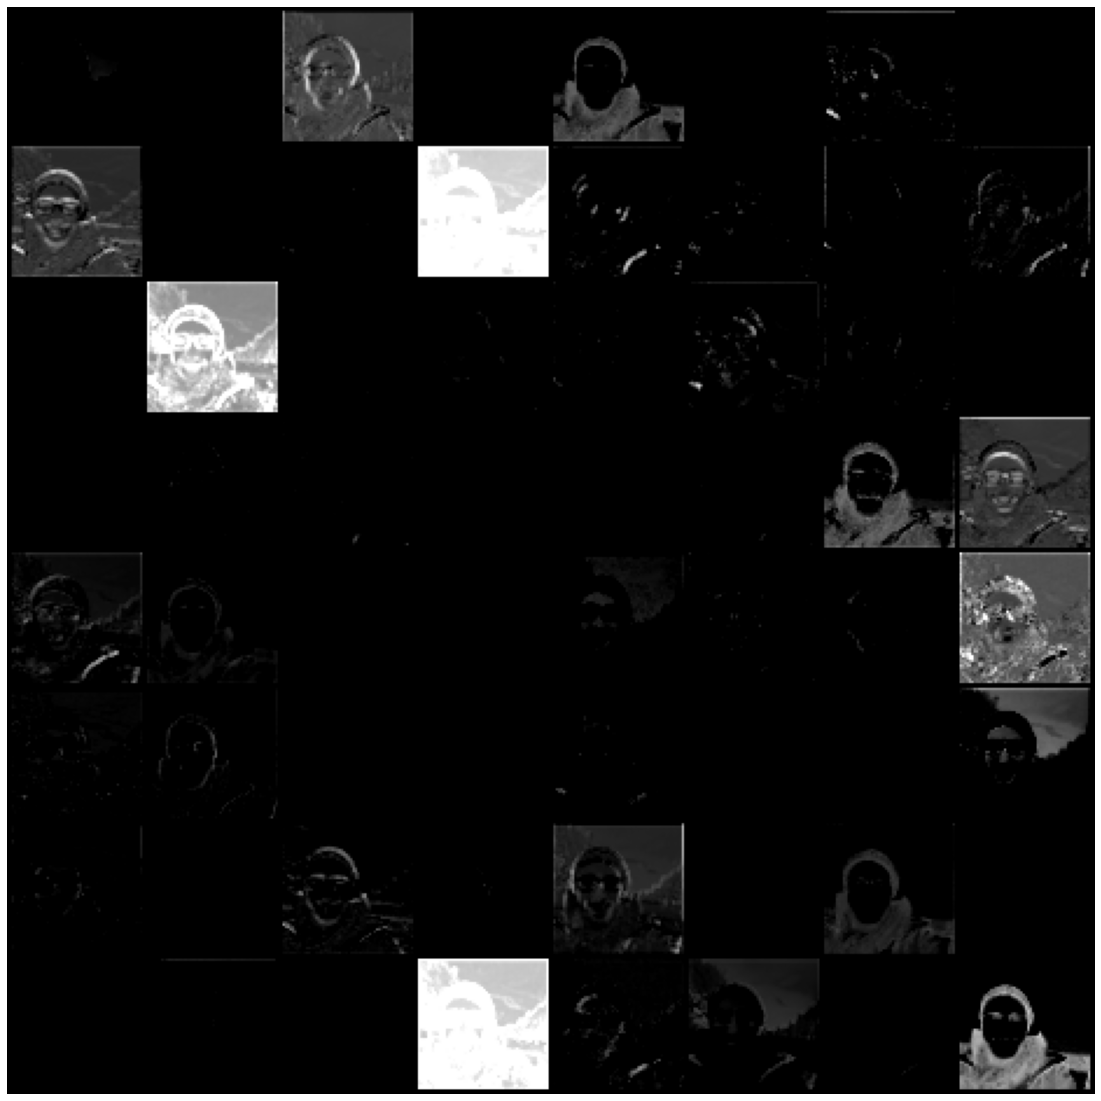

In [16]:
img = make_grid(save_output.outputs[1].detach().cpu().permute(1,0,2,3))
plt.figure(figsize=(20,20))
plt.imshow(img.permute(1, 2, 0))
plt.axis('off')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(-0.5, 465.5, 465.5, -0.5)

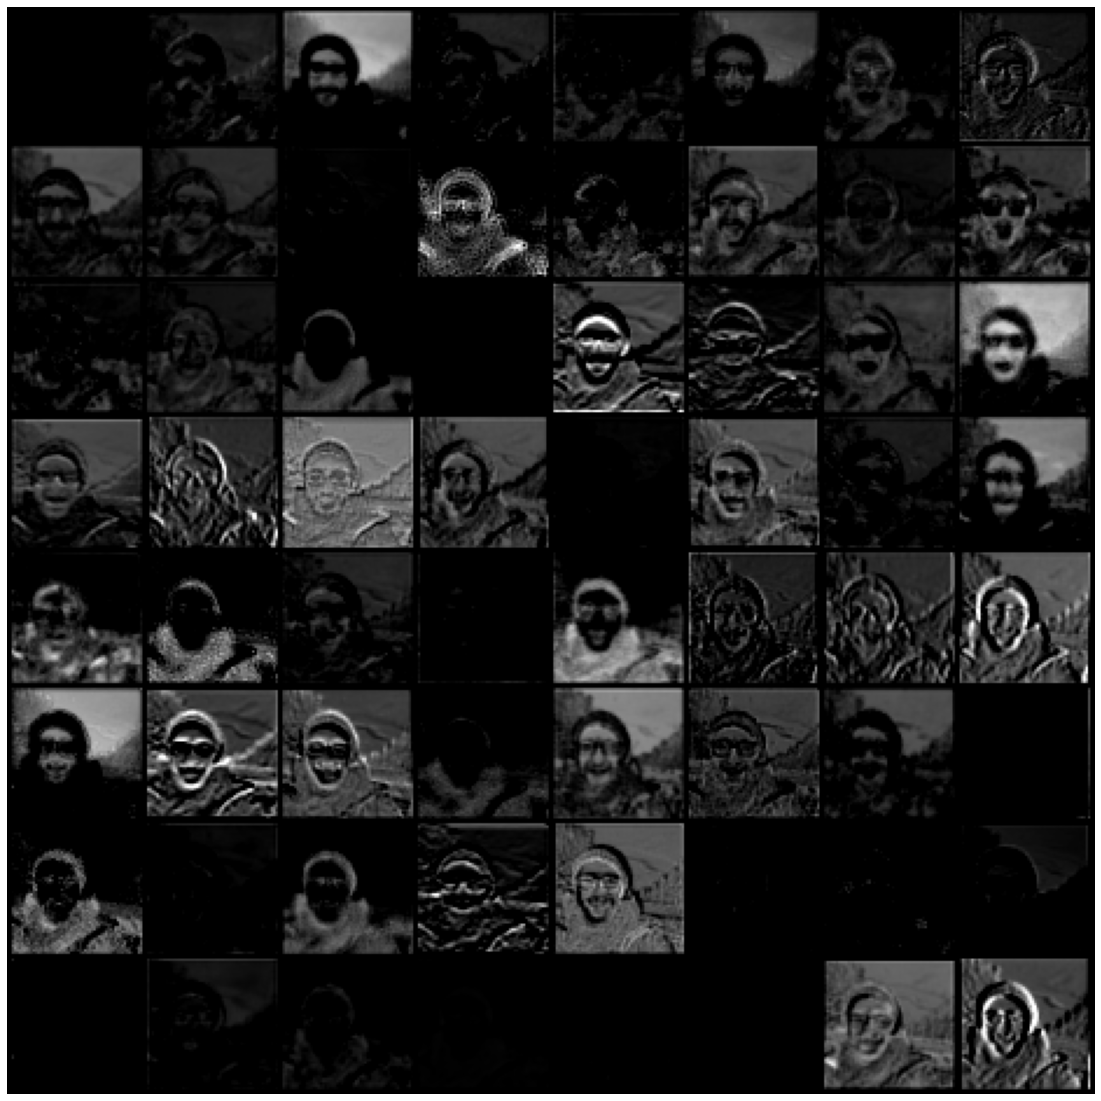

In [18]:
img = make_grid(save_output.outputs[2].detach().cpu().permute(1,0,2,3))
plt.figure(figsize=(20,20))
plt.imshow(img.permute(1, 2, 0))
plt.axis('off')